In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-data/sample_submission.csv
/kaggle/input/fraud-data/test_identity.csv
/kaggle/input/fraud-data/train_identity.csv
/kaggle/input/fraud-data/test_transaction.csv
/kaggle/input/fraud-data/train_transaction.csv


In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# IMPORTS

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.utils import resample
import shap

# DATA INSPECTION

In [67]:
df_transaction = pd.read_csv('/kaggle/input/fraud-data/train_transaction.csv')
df_transaction

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [68]:
df_identity = pd.read_csv('/kaggle/input/fraud-data/train_identity.csv')
df_identity

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,27.0,567.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,15.0,352.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


# DATA MERGE

In [69]:
df_transaction.shape, df_identity.shape

((590540, 394), (144233, 41))

In [70]:
df_transaction['key_id'] = (
    df_transaction['card1'].astype(str) + '_' +
    df_transaction['addr1'].astype(str) + '_' +
    df_transaction['P_emaildomain'].astype(str)
)
df = df_transaction.merge(df_identity, how='left', on='TransactionID')

In [71]:
df.shape

(590540, 435)

In [72]:
df['key_id'].nunique()

90375

# UNDER SAMPLING

In [73]:
df.shape

(590540, 435)

In [74]:
fraud_df = df[df['isFraud'] == 1]
non_fraud_df = df[df['isFraud'] == 0]

non_fraud_undersampled = resample(non_fraud_df, replace=False, n_samples=3*len(fraud_df), random_state=42)

df_undersampled = pd.concat([fraud_df, non_fraud_undersampled])

df = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [75]:
fraud_df.shape

(20663, 435)

In [76]:
df.shape

(82652, 435)

# DATA SPLIT

In [77]:
gss1 = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_valid_idx, test_idx = next(gss1.split(df, groups=df['key_id']))

train_valid_df = df.iloc[train_valid_idx]
test_df = df.iloc[test_idx]

gss2 = GroupShuffleSplit(n_splits=1, train_size=0.75, random_state=42)
train_idx, valid_idx = next(gss2.split(train_valid_df, groups=train_valid_df['key_id']))

train_df = train_valid_df.iloc[train_idx]
valid_df = train_valid_df.iloc[valid_idx]

X_train = train_df.drop(columns='isFraud')
y_train = train_df['isFraud']

X_valid = valid_df.drop(columns='isFraud')
y_valid = valid_df['isFraud']

X_test = test_df.drop(columns='isFraud')
y_test = test_df['isFraud']

In [78]:
X_train.shape, X_valid.shape, X_test.shape

((48455, 434), (17381, 434), (16816, 434))

In [79]:
no_nan_cols = [col for col in df_transaction.columns if df_transaction[col].isna().sum() == 0]
print("no nan cols:", no_nan_cols)

no nan cols: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'key_id']


In [81]:
X_train

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,key_id,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
2,3268454,6875600,117.000,W,9592,532.0,150.0,mastercard,224.0,debit,143.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0,1.0,524.0,524.0,175.0,524.0,175.0,NaN,NaN,NaN,NaN,210.0,NaN,NaN,NaN,NaN,454.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9592_143.0_hotmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3231066,5

# DATA CLEANING

In [82]:
class CustomNuniqueHandlerClass(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1):
        self.threshold = threshold
        self.drop_cols = []
        
    def fit(self, X, y):
        for col in X.columns:
            value_counts = X[col].value_counts(normalize=True)
            
            if value_counts.iloc[0] > self.threshold:
                self.drop_cols.append(col)

        return self
    
    def transform(self, X):
        cols_to_drop = [col for col in self.drop_cols if col in X.columns]
        return X.drop(columns=cols_to_drop)
    

In [83]:
class CustomMajorNanHandlerClass(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.drop_cols = []

    def fit(self, X, y):
        self.drop_cols = [col for col in X.columns if X[col].isna().mean() > self.threshold]
        return self
    
    def transform(self, X):
        cols_to_drop = [col for col in self.drop_cols if col in X.columns]
        return X.drop(columns=cols_to_drop)

In [84]:
cleaning_pipeline = Pipeline(steps=[
    ('nunique_handler', CustomNuniqueHandlerClass(threshold=0.85)),
    ('nan_handler', CustomMajorNanHandlerClass(threshold=0.8))
])

In [85]:
X_cleaned = cleaning_pipeline.fit_transform(X_train, y_train)

In [86]:
print("before:", X_train.shape)
print("after:", X_cleaned.shape)

before: (48455, 434)
after: (48455, 216)


In [87]:
# experiment_name = "Logistic_Regression_Training"
# run_name = "Logistic_Regression_Cleaning2"

# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("nunique_threshold", 0.9)
#     mlflow.log_param("nan_threshold", 0.9)
    
#     cleaning_pipeline.fit(X_train, y_train)

#     mlflow.sklearn.log_model(cleaning_pipeline, "cleaning_pipeline")

# DATA ENGINEERING

In [88]:
class CustomCategoricalEncoderClass(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3, a_encoder=None, b_encoder=None):
        self.threshold = threshold
        self.a_encoder = a_encoder
        self.b_encoder = b_encoder
        self.a_cols = []
        self.b_cols = []
    
    def fit(self, X, y):
        real_a_encoder = self.a_encoder if self.a_encoder is not None else OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        real_b_encoder = self.b_encoder if self.b_encoder is not None else OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        
        self.a_cols = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique() <= self.threshold]
        self.b_cols = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique() > self.threshold]

        if self.a_cols:
            self.fit_a_encoder = clone(real_a_encoder).fit(X[self.a_cols])
        else:
            self.fit_a_encoder = None
            
        if self.b_cols:
            self.fit_b_encoder = clone(real_b_encoder).fit(X[self.b_cols])
        else:
            self.fit_b_encoder = None
            
        return self
    
    def transform(self, X):
        X = X.copy()
        a_encoded = pd.DataFrame()
        b_encoded = pd.DataFrame()

        available_a_cols = [col for col in self.a_cols if col in X.columns]
        available_b_cols = [col for col in self.b_cols if col in X.columns]
        
        if self.fit_a_encoder and available_a_cols:
            a_encoded = pd.DataFrame(
                self.fit_a_encoder.transform(X[available_a_cols]),
                index=X.index,
                columns=self.fit_a_encoder.get_feature_names_out(available_a_cols)
            )
        if self.fit_b_encoder and available_b_cols:
            b_encoded = pd.DataFrame(
                self.fit_b_encoder.transform(X[available_b_cols]),
                index=X.index,
                columns=available_b_cols
            )
        X_removed = X.drop(columns=available_a_cols + available_b_cols)

        return pd.concat([X_removed, a_encoded, b_encoded], axis=1)


In [89]:
class CustomWoeEncoderClass(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.cat_columns = []
        self.woe_mappings = {}
        
    def fit(self, X, y):
        df = X.copy()
        df[self.target_col] = y

        self.cat_columns = [col for col in df.columns if df[col].dtype == 'object']

        for col in self.cat_columns:
            groups = df.groupby([col])[self.target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            
            self.woe_mappings[col] = woe_dict
                    
        return self
        
    
    def transform(self, X):
        df = X.copy()
        for col in self.cat_columns:
            mapping = self.woe_mappings.get(col)
            df[f"{col}_woe"] = df[col].map(mapping).fillna(0)
        return df.drop(columns=[col for col in self.cat_columns if col in df.columns], errors='ignore')
    

In [90]:
a_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
b_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
engineering_pipeline = Pipeline(steps=[
    ('categorical_encoder', CustomCategoricalEncoderClass(
        threshold=4,
        a_encoder=a_encoder,
        b_encoder=b_encoder)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [91]:
X_engineered = engineering_pipeline.fit_transform(X_cleaned, y_train)
print("before:", X_cleaned.shape)
print("after:", X_engineered.shape)

before: (48455, 216)
after: (48455, 254)


In [92]:
# experiment_name = "Logistic_Regression_Training"
# run_name = "Logistic_Regression_Engineering"

# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("categorical_threshold", 4)
#     mlflow.log_param("a_encoder", "OneHotEncoder")
#     mlflow.log_param("b_encoder", "OrdinalEncoder")
#     mlflow.log_param("imputer_strategy", "mean")
#     mlflow.log_param("scaler", "standard")
    
#     engineering_pipeline.fit(X_train, y_train)

#     mlflow.sklearn.log_model(engineering_pipeline, "engineering_pipeline")

# TRAINING

In [104]:
nunique_thresholds = [0.9, 0.8]
nan_thresholds = [0.9, 0.8]
categorical_thresholds = [5]
a_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
b_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
imputers = ['mean']
scalers = {'standard': StandardScaler()}


pipeline = None
best_pipeline = None
best_roc_auc = 0
best_params = None

for uniquet in nunique_thresholds:
    for nant in nan_thresholds:
        for catt in categorical_thresholds:
            for imputer in imputers:
                for scaler_name, scaler in scalers.items():
                    print()
                    print(f'uniquet={uniquet}, nt={nant}, catt={catt}, imputer={imputer}, scaler={scaler_name}')
          
                    pipeline = Pipeline(steps=[
                        ('nunique_handler', CustomNuniqueHandlerClass(threshold=uniquet)),
                        ('nan_handler', CustomMajorNanHandlerClass(threshold=nant)),
                        ('categorical_encoder', CustomCategoricalEncoderClass(
                            threshold=catt,
                            a_encoder=clone(a_encoder),
                            b_encoder=clone(b_encoder))),
                        ('imputer', SimpleImputer(strategy=imputer)),
                        ('scaler', clone(scaler)),
                        ('model', LogisticRegression(max_iter=1000))
                    ])
                    
                    pipeline.fit(X_train, y_train)
                    
                    y_train_pred = pipeline.predict(X_train)
                    y_train_prob = pipeline.predict_proba(X_train)[:, 1]
                    
                    train_roc_auc = roc_auc_score(y_train, y_train_prob)
                    train_f1 = f1_score(y_train, y_train_pred)
                    print("TRAIN")
                    print(f"ROC AUC Score: {train_roc_auc}")
                    print(f"F1 Score: {train_f1}")
                    
                    
                    y_valid_pred = pipeline.predict(X_valid)
                    y_valid_prob = pipeline.predict_proba(X_valid)[:, 1]
                    
                    valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
                    valid_f1 = f1_score(y_valid, y_valid_pred)
                    print("VALID")
                    print(f"ROC AUC Score: {valid_roc_auc}")
                    print(f"F1 Score: {valid_f1}")

                    if valid_roc_auc > best_roc_auc:
                        best_roc_auc = valid_roc_auc
                        best_pipeline = pipeline
                        best_params = (uniquet, nant, catt, imputer, scaler_name)


print("-------------------------")
print("TEST")
print("best params:", best_params)
y_test_pred = best_pipeline.predict(X_test)
y_test_prob = best_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_prob)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"ROC AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



uniquet=0.9, nt=0.9, catt=5, imputer=mean, scaler=standard
TRAIN
ROC AUC Score: 0.8663167294520226
F1 Score: 0.6218654915538768
VALID
ROC AUC Score: 0.8332125836038479
F1 Score: 0.5608554945828057

uniquet=0.9, nt=0.8, catt=5, imputer=mean, scaler=standard
TRAIN
ROC AUC Score: 0.8606882856825194
F1 Score: 0.6091595795256458
VALID
ROC AUC Score: 0.8303743594042314
F1 Score: 0.5525534021785259

uniquet=0.8, nt=0.9, catt=5, imputer=mean, scaler=standard
TRAIN
ROC AUC Score: 0.8564608880816243
F1 Score: 0.5997766788961557
VALID
ROC AUC Score: 0.8323174732119507
F1 Score: 0.5723915180452183

uniquet=0.8, nt=0.8, catt=5, imputer=mean, scaler=standard
TRAIN
ROC AUC Score: 0.8517168190317671
F1 Score: 0.5862734584450402
VALID
ROC AUC Score: 0.8274531538460955
F1 Score: 0.5673279864921908
-------------------------
TEST
best params: (0.9, 0.9, 5, 'mean', 'standard')
ROC AUC Score: 0.85373016967668
Accuracy: 0.844790675547098
Precision: 0.8479874951152794
Recall: 0.4941926668184924
F1 Score: 0.6

# LOAD PREPROCESSING PIPELINES

In [95]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 50.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 81.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      S

In [99]:
import dagshub
dagshub.init(repo_owner='gkuch22', repo_name='ml-hw2-gkuch22', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=49368503-dde8-437a-87e7-164648667c0f&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=14a46707ca6e546addf6a5ea519d116774da55b0ac143016c3ee6d08dc880e69




Accessing as gkuch22

Initialized MLflow to track repo "gkuch22/ml-hw2-gkuch22"

Repository gkuch22/ml-hw2-gkuch22 initialized!

In [100]:
logged_model = 'runs:/e7ecce33575d4a71908b1a40eedd4d2a/cleaning_pipeline'
cleaning_pipeline = mlflow.sklearn.load_model(logged_model)

logged_model = 'runs:/2b87f4588b4e419fae5e847bf8c2c903/engineering_pipeline'
engineering_pipeline = mlflow.sklearn.load_model(logged_model)

final_pipeline = Pipeline(steps=[
                        ('cleaning', cleaning_pipeline),
                        ('engineering', engineering_pipeline),
                        ('model', LogisticRegression(max_iter=1000))
                    ])

final_pipeline.fit(X_train, y_train)
                    
y_pred = final_pipeline.predict(X_test)
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"ROC AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

ROC AUC Score: 0.8507645829428861
Accuracy: 0.840092768791627
Precision: 0.8376984126984127
Recall: 0.4807560920063767
F1 Score: 0.6109101432498915


# ANALYSIS

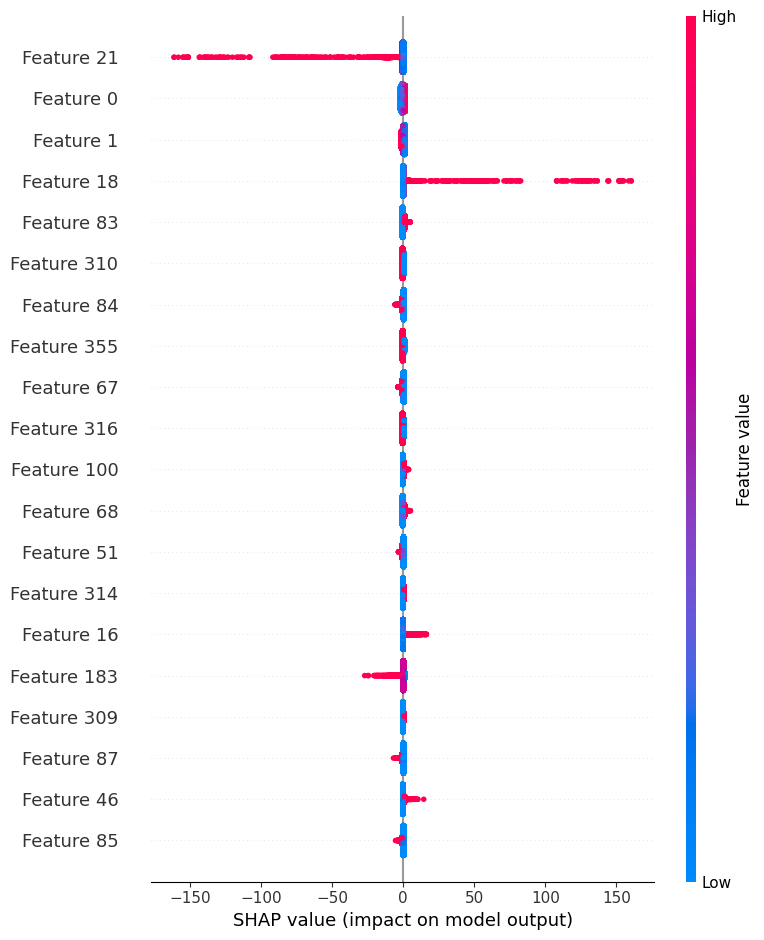

In [102]:
model = best_pipeline.named_steps['model']
X_train_transformed = best_pipeline[:-1].transform(X_train)
explainer = shap.Explainer(model, X_train_transformed)
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed)

# MLFLOW TRACKING

In [74]:
# !pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 56.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 80.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      S

In [76]:
# import dagshub
# dagshub.init(repo_owner='gkuch22', repo_name='ml-hw2-gkuch22', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=2d115990-9458-44e2-8a07-33c72d137ea2&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=04259f1de3ef7274bc067ef2b9b01f458972ab79864d7e723c0725f8d9c05f58




Accessing as gkuch22

Initialized MLflow to track repo "gkuch22/ml-hw2-gkuch22"

Repository gkuch22/ml-hw2-gkuch22 initialized!

In [75]:
# experiment_name = "Logistic_Regression_Training"
# run_name = "Logistic_Regression_Best_Model"

In [76]:
# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("nunique_threshold", 0,9)
#     mlflow.log_param("nan_threshold", 0.9)
#     mlflow.log_param("categorical_threshold", 5)
#     mlflow.log_param("a_encoder", "OneHotEncoder")
#     mlflow.log_param("b_encoder", "OrdinalEncoder")
#     # mlflow.log_param("cat_encoder", "woe")
#     mlflow.log_param("imputer_strategy", "mean")
#     mlflow.log_param("scaler", "standard")

#     mlflow.log_param("model_type", "LogisticRegression")
    

#     # aq thresholdebis listebidan .fitamde
    

#     pipeline.fit(X_train, y_train)

#     y_pred = pipeline.predict(X_test)
#     y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
#     roc_auc = roc_auc_score(y_test, y_pred_prob)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     mlflow.log_metric("roc_auc", roc_auc)
#     mlflow.log_metric("accuracy", accuracy)
#     mlflow.log_metric("precision", precision)
#     mlflow.log_metric("recall", recall)
#     mlflow.log_metric("f1", f1)

#     mlflow.sklearn.log_model(pipeline, "model")
    
#     print(f"ROC AUC Score: {roc_auc}")
#     print(f"Accuracy: {accuracy}")
#     print(f"Precision: {precision}")
#     print(f"Recall: {recall}")
#     print(f"F1 Score: {f1}")


uniquet=0.9, nt=0.9, catt=5, imputer=mean, scaler=standard


2025/04/22 08:46:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


ROC AUC Score: 0.85373016967668
Accuracy: 0.844790675547098
Precision: 0.8479874951152794
Recall: 0.4941926668184924
F1 Score: 0.6244604316546764
🏃 View run Logistic_Regression_Best_Model at: https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow/#/experiments/0/runs/83e0e78dbe024f6b99fb0dc2c643e20b
🧪 View experiment at: https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow/#/experiments/0


# SUBMISSION

In [86]:
submission = pd.read_csv('/kaggle/input/fraud-data/sample_submission.csv')
submission

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5
...,...,...
506686,4170235,0.5
506687,4170236,0.5
506688,4170237,0.5
506689,4170238,0.5


In [87]:
df_test_transaction = pd.read_csv('/kaggle/input/fraud-data/test_transaction.csv')
df_test_identity = pd.read_csv('/kaggle/input/fraud-data/test_identity.csv')

df_test_transaction['key_id'] = (
    df_test_transaction['card1'].astype(str) + '_' +
    df_test_transaction['addr1'].astype(str) + '_' +
    df_test_transaction['P_emaildomain'].astype(str)
)
df_test = df_test_transaction.merge(df_test_identity, how='left', on='TransactionID')
df_test_transaction.shape, df_test_identity.shape, df_test.shape

df_test.columns = [col.replace('-', '_') for col in df_test.columns]

In [88]:
X_train.shape, y_train.shape

((48455, 434), (48455,))

In [89]:
import mlflow

import os
os.environ["MLFLOW_TRACKING_USERNAME"] = "gkuch22"
os.environ["MLFLOW_TRACKING_PASSWORD"] = ""

mlflow.set_tracking_uri("https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow")

logged_model = "models:/Logistic_Regression_BM/1"

loaded_model = mlflow.sklearn.load_model(logged_model)

In [92]:
y_test_proba = loaded_model.predict_proba(df_test)[:, 1]

In [94]:
submission = pd.DataFrame({
    'TransactionID': df_test['TransactionID'],
    'isFraud': y_test_proba
})

In [95]:
submission

,TransactionID,isFraud
0,3663549,0.019285
1,3663550,0.019635
2,3663551,0.330222
3,3663552,0.029354
4,3663553,0.043231
...,...,...
506686,4170235,0.239096
506687,4170236,0.491085
506688,4170237,0.136962
506689,4170238,0.169191


In [96]:
submission.to_csv('logistic_regression_submission.csv', index=False)